<a href="https://colab.research.google.com/github/vino061005/first/blob/main/Project_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving healthcare_dataset.csv to healthcare_dataset.csv

Missing Values:
 Age                0
Gender             0
Blood_Pressure     0
Cholesterol        0
Blood_Sugar        0
Heart_Rate         0
BMI                0
Disease           13
dtype: int64

Data Types:
 Age                 int64
Gender             object
Blood_Pressure      int64
Cholesterol         int64
Blood_Sugar         int64
Heart_Rate          int64
BMI               float64
Disease            object
dtype: object

Basic Statistics:
               Age  Blood_Pressure  Cholesterol  Blood_Sugar  Heart_Rate  \
count  100.000000      100.000000   100.000000   100.000000  100.000000   
mean    49.580000      134.090000   227.250000   135.740000   89.590000   
std     18.031499       26.413608    44.758922    38.480382   15.865021   
min     21.000000       90.000000   151.000000    70.000000   60.000000   
25%     34.000000      113.000000   186.000000   102.750000   76.750000   
50%     48.000000      133.500000   234

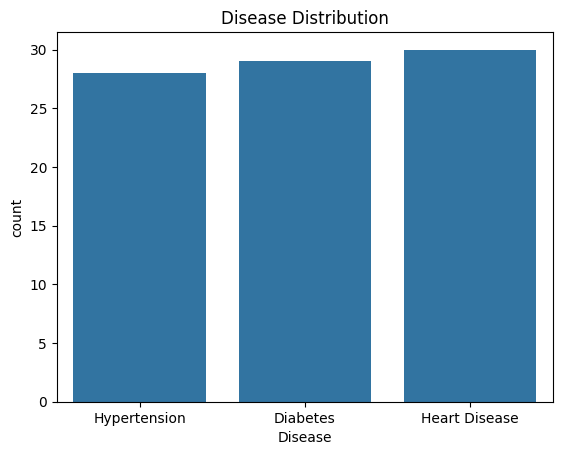

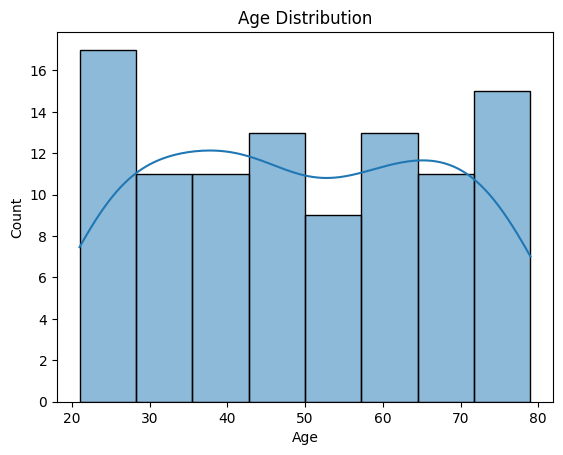

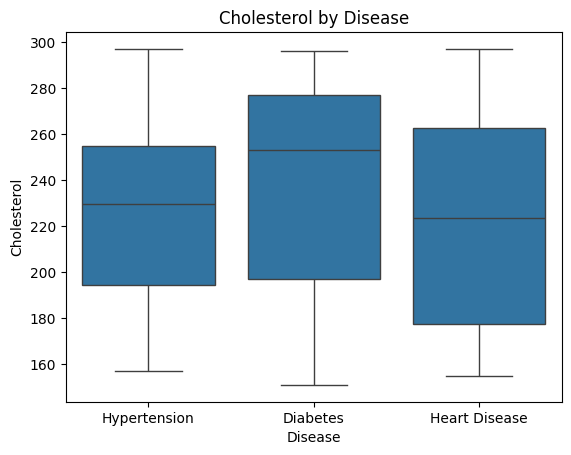

Accuracy: 0.2

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.40      0.36         5
           2       0.33      0.33      0.33         6
           3       0.00      0.00      0.00         3

    accuracy                           0.20        20
   macro avg       0.17      0.18      0.17        20
weighted avg       0.18      0.20      0.19        20



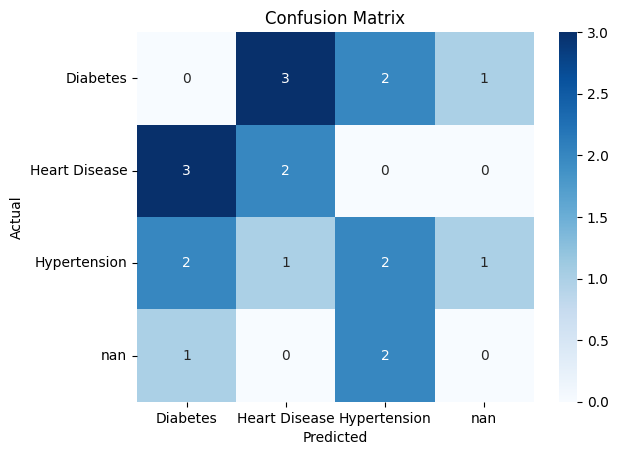

Predicted Disease: Hypertension


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

# Step 3: Data Cleaning
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.drop_duplicates(inplace=True)

# Step 4: Exploratory Data Analysis (EDA)
print("\nBasic Statistics:\n", df.describe())

# Visualizations
sns.countplot(x='Disease', data=df)
plt.title("Disease Distribution")
plt.show()

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Disease', y='Cholesterol', data=df)
plt.title("Cholesterol by Disease")
plt.show()

# Step 5: Feature Engineering
# Label encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_disease = LabelEncoder()
df['Disease'] = le_disease.fit_transform(df['Disease'])

# Step 6: Feature and Label Separation
X = df.drop("Disease", axis=1)
y = df["Disease"]

# Step 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_disease.classes_, yticklabels=le_disease.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 11: Prediction on New Data (Example)
sample = np.array([[50, 1, 140, 230, 130, 85, 27.2]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("Predicted Disease:", le_disease.inverse_transform(prediction)[0])